## Mátrix szorzó

In [1]:
"""Importálás"""

import numpy as np
import numba as nb
from matplotlib import pyplot as plt

In [2]:
"""Mátrixok létrehozás"""

n = 256  # méret
a = np.random.random((n, n))
b = np.random.random((n, n))

# időméréshez:
times = [None, None, None, None, None, None]

In [3]:
"""Natív Python"""

def matmul(a, b):
    M = a.shape[0]
    K = a.shape[1] # = b.shape[0]
    N = b.shape[1]
    c = np.zeros((M, N))
    for i in range(M):
        for j in range(N):
            for k in range(K):
                c[i,j] += a[i,k] * b[k,j]
    return c

matmul(a, b)
times[0] = %timeit -o matmul(a, b)

5.23 s ± 76.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
"""Numba sima JIT fordító"""

@nb.njit    # JIT dekorátor
def matmul(a, b):
    M = a.shape[0]
    K = a.shape[1] # = b.shape[0]
    N = b.shape[1]
    c = np.zeros((M, N))
    for i in range(M):
        for j in range(N):
            for k in range(K):
                c[i,j] += a[i,k] * b[k,j]
    return c

matmul(a, b)
times[1] = %timeit -o matmul(a, b)

20.2 ms ± 90.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
"""Numba JIT fordító beépített párhuzamosítással"""

@nb.njit(parallel = True)
def matmul(a, b):
    M = a.shape[0]
    K = a.shape[1] # = b.shape[0]
    N = b.shape[1]
    c = np.zeros((M, N))
    for i in nb.prange(M):
        for j in nb.prange(N):
            for k in nb.prange(K):
                c[i,j] += a[i,k] * b[k,j]
    return c

matmul(a, b)
times[2] = %timeit -o matmul(a, b)

2.75 ms ± 248 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
"""Numba JIT fordító késleltetésre optimalizálva"""

@nb.njit
def matmul(a, b):
    M = a.shape[0]
    K = a.shape[1] # = b.shape[0]
    N = b.shape[1]
    c = np.zeros((M, N))
    for i in range(M):
        for j in range(0, N, 8):
            for k in range(K):
                c[i,j] += a[i,k] * b[k,j]
                c[i,j+1] += a[i,k] * b[k,j+1]
                c[i,j+2] += a[i,k] * b[k,j+2]
                c[i,j+3] += a[i,k] * b[k,j+3]
                c[i,j+4] += a[i,k] * b[k,j+4]
                c[i,j+5] += a[i,k] * b[k,j+5]
                c[i,j+6] += a[i,k] * b[k,j+6]
                c[i,j+7] += a[i,k] * b[k,j+7]
    return c

matmul(a, b)
times[3] = %timeit -o matmul(a, b)

10 ms ± 59.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
"""Numba JIT fordító beépített párhuzamosítással és késleltetésre optimalizálva"""

@nb.njit(parallel = True)
def matmul(a, b):
    M = a.shape[0]
    K = a.shape[1] # = b.shape[0]
    N = b.shape[1]
    c = np.zeros((M, N))
    for i in nb.prange(M):
        for j in range(0, N, 8):
            for k in nb.prange(K):
                c[i,j] += a[i,k] * b[k,j]
                c[i,j+1] += a[i,k] * b[k,j+1]
                c[i,j+2] += a[i,k] * b[k,j+2]
                c[i,j+3] += a[i,k] * b[k,j+3]
                c[i,j+4] += a[i,k] * b[k,j+4]
                c[i,j+5] += a[i,k] * b[k,j+5]
                c[i,j+6] += a[i,k] * b[k,j+6]
                c[i,j+7] += a[i,k] * b[k,j+7]
    return c

matmul(a, b)
times[4] = %timeit -o matmul(a, b)

1.45 ms ± 41.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [10]:
"""Beépített függvény (Numpy)"""

times[5] = %timeit -o np.matmul(a, b)

257 µs ± 5.72 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Text(0, 0.5, 'time [s]')

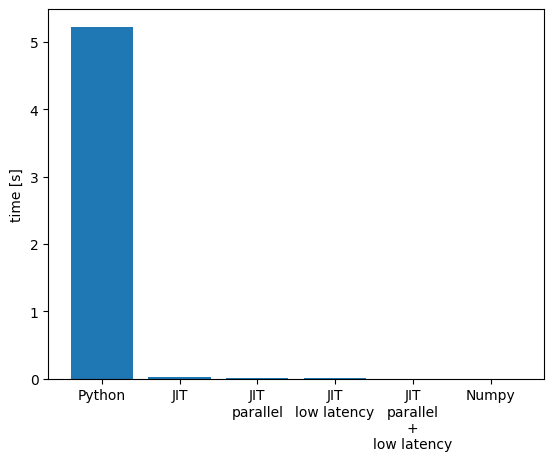

In [11]:
plt.bar(['Python', 'JIT', 'JIT\nparallel', 'JIT\nlow latency', 'JIT\nparallel\n+\nlow latency', 'Numpy'], [t.average for t in times])
plt.ylabel('time [s]')

Text(0, 0.5, 'time [s]')

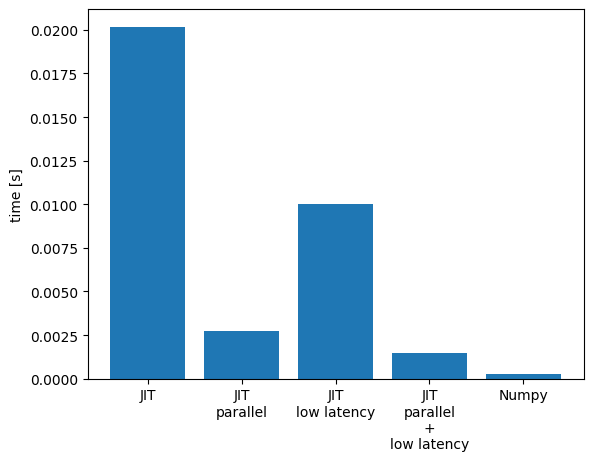

In [12]:
plt.bar(['JIT', 'JIT\nparallel', 'JIT\nlow latency', 'JIT\nparallel\n+\nlow latency', 'Numpy'], [t.average for t in times[1:]])
plt.ylabel('time [s]')

## Tömb összeadó

In [13]:
# Importálás

import numpy as np
import numba as nb
from matplotlib import pyplot as plt

# Tömbök létrehozása

n = 2**20 # kb 1 000 000
a = np.random.random((n))
times = [None, None, None, None, None, None, None]

# Natív python

def my_sum(a):
    ret = 0.0
    for i in range(len(a)):
        ret += a[i]
    return ret

times[0] = %timeit -o my_sum(a)
times[1] = %timeit -o sum(a)    # beépített függvény

# Numba JIT fordító

@nb.njit
def my_sum(a):
    ret = 0.0
    for i in range(len(a)):
        ret += a[i]
    return ret

my_sum(a)
times[2] = %timeit -o my_sum(a)

# Numba JIT fordító beépített párhuzamosítással

@nb.njit(parallel=True)
def my_sum(a):
    ret = 0.0
    for i in nb.prange(len(a)):
        ret += a[i]
    return ret

my_sum(a)
times[3] = %timeit -o my_sum(a)

# Numba JIT fordító késleltetésre optimalizálva

@nb.njit()
def my_sum(a):
    ret0 = ret1 = ret2 = ret3 = ret4 = ret5 = ret6 = ret7 = 0.0
    for i in range(int(len(a)/8)):
        j = 8*i
        ret0 += a[j]
        ret1 += a[j+1]
        ret2 += a[j+2]
        ret3 += a[j+3]
        ret4 += a[j+4]
        ret5 += a[j+5]
        ret6 += a[j+6]
        ret7 += a[j+7]
    return (ret0 + ret1 +ret2 +ret3 +ret4 +ret5 +ret6 + ret7)

my_sum(a)
times[4] = %timeit -o my_sum(a)

# Numba JIT fordító beépített párhuzamosítással és késleltetésre optimalizálva

@nb.njit(parallel=True)
def my_sum(a):
    ret0 = ret1 = ret2 = ret3 = ret4 = ret5 = ret6 = ret7 = 0.0
    for i in nb.prange(int(len(a)/8)):
        j = 8*i
        ret0 += a[j]
        ret1 += a[j+1]
        ret2 += a[j+2]
        ret3 += a[j+3]
        ret4 += a[j+4]
        ret5 += a[j+5]
        ret6 += a[j+6]
        ret7 += a[j+7]
    return (ret0 + ret1 +ret2 +ret3 +ret4 +ret5 +ret6 + ret7)

my_sum(a)
times[5] = %timeit -o my_sum(a)

# Numpy beépített függvény

times[6] = %timeit -o np.sum(a)

93.2 ms ± 920 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
60.3 ms ± 277 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
732 µs ± 1.54 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
85.5 µs ± 2.87 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
117 µs ± 4.27 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
55.5 µs ± 823 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
429 µs ± 43.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Text(0, 0.5, 'time [s]')

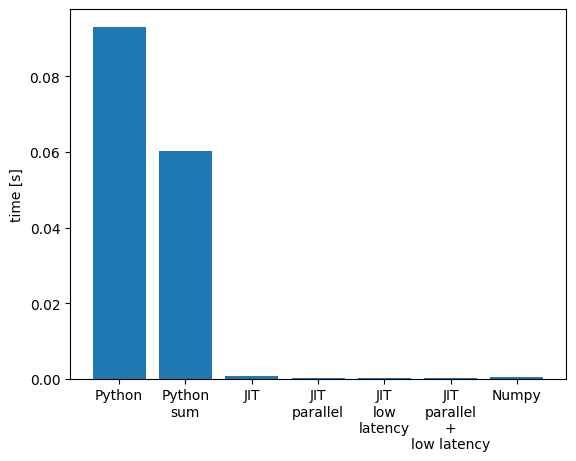

In [14]:
plt.bar(['Python', 'Python\nsum', 'JIT', 'JIT\nparallel', 'JIT\nlow\nlatency', 'JIT\nparallel\n+\nlow latency', 'Numpy'], [t.average for t in times])
plt.ylabel('time [s]')

Text(0, 0.5, 'time [s]')

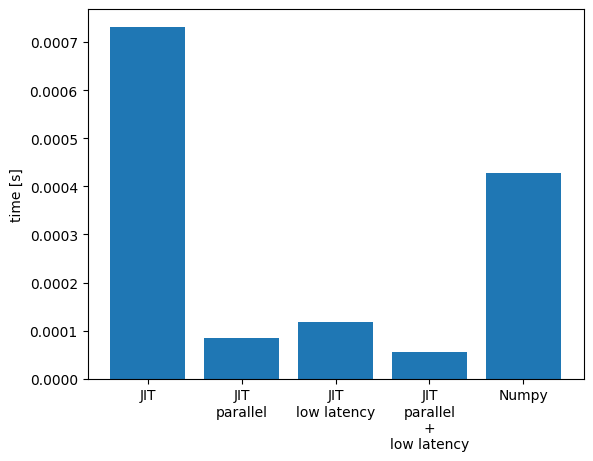

In [15]:
plt.bar(['JIT', 'JIT\nparallel', 'JIT\nlow latency', 'JIT\nparallel\n+\nlow latency', 'Numpy'], [t.average for t in times[2:]])
plt.ylabel('time [s]')

## Cache latency
Cache Size:
* L1: 0.5 MB - 64 kB/core
* L2: 4.0 MB - 512 kB/core
* L3: 16 MB

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
N = []
times = []

for n in np.linspace(3, 10, 30):
    n = int(2**n)
    a = np.random.random((n))
    b = np.random.random((n))
    time = %timeit -o -q -r 10 -n 100000 np.matmul(a, b)
    print(f'{n=},   log_2(n)={np.log2(n): .2f},   {1e6*time.average: .4f} [us] ({1e9*time.average/n: .2f} [ns/n])                             ', end='\r')
    times.append(time.average)
    N.append(n)

for n in np.linspace(10, 14, 20):
    n = int(2**n)
    a = np.random.random((n))
    b = np.random.random((n))
    time = %timeit -o -q -r 10 -n 1000 np.matmul(a, b)
    print(f'{n=},   log_2(n)={np.log2(n): .2f},   {1e6*time.average: .4f} [us] ({1e9*time.average/n: .2f} [ns/n])                             ', end='\r')
    times.append(time.average)
    N.append(n)

for n in np.linspace(14, 18, 20):
    n = int(2**n)
    a = np.random.random((n))
    b = np.random.random((n))
    time = %timeit -o -q -r 10 -n 100 np.matmul(a, b)
    print(f'{n=},   log_2(n)={np.log2(n): .2f},   {1e6*time.average: .4f} [us] ({1e9*time.average/n: .2f} [ns/n])                             ', end='\r')
    times.append(time.average)
    N.append(n)

for n in np.linspace(18, 24, 50):
    n = int(2**n)
    a = np.random.random((n))
    b = np.random.random((n))
    time = %timeit -o -q -r 10 -n 10 np.matmul(a, b)
    print(f'{n=},   log_2(n)={np.log2(n): .2f},   {1e6*time.average: .4f} [us] ({1e9*time.average/n: .2f} [ns/n])                             ', end='\r')
    times.append(time.average)
    N.append(n)

L1 cache:  64000 Bytes --> n = 9.97
L2 cache:  512000 Bytes --> n = 12.97
L3 cache:  16000000 Bytes --> n = 17.93


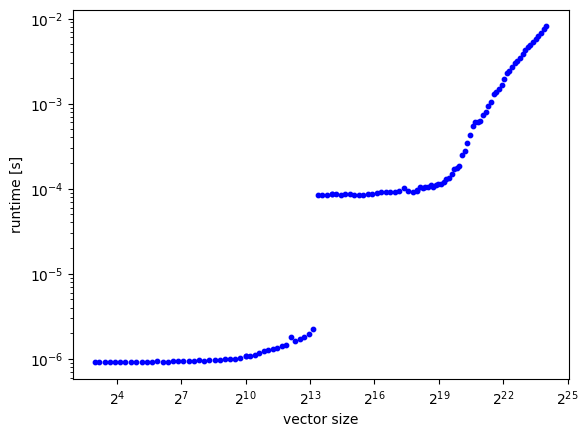

In [17]:
cache = [64e3, 512e3, 16e6] # [Byte/core]
limits = [np.log2(c/8/8) for c in cache]
for i, (c, l) in enumerate(zip(cache, limits)):
    print(f'L{i+1} cache: {c: .0f} Bytes --> n ={l: .2f}')

plt.scatter(N, times, s=10, color='b')
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.xlabel('vector size')
plt.ylabel('runtime [s]')
#plt.axvline(x=2**limits[0], c='black', linewidth=1)
#plt.axvline(x=2**limits[1], c='black', linewidth=1)
#plt.axvline(x=2**limits[2], c='black', linewidth=1)

plt.show()

L1 cache:  64000 Bytes --> n = 9.97
L2 cache:  512000 Bytes --> n = 12.97
L3 cache:  16000000 Bytes --> n = 17.93


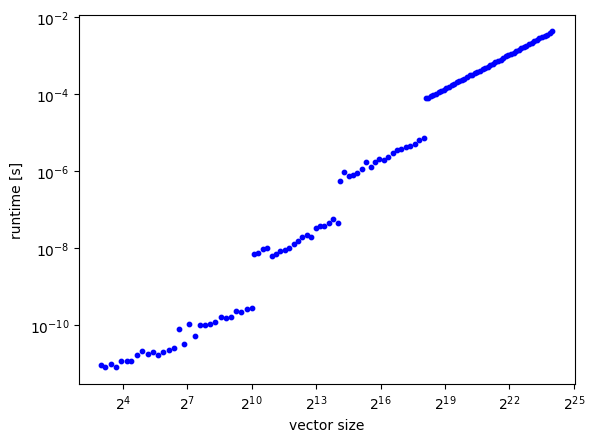

In [21]:
import numpy as np
import csv
from matplotlib import pyplot as plt

# Open the CSV file for reading
with open('HPC\\x64\\Release\\dot_product_time_1.csv', 'r') as file:

    # Create a CSV reader object
    reader = csv.reader(file)

    # Read the header row
    header = next(reader)

    # Read the data rows and store them in NumPy arrays
    array_sizes = np.array([])
    run_times = np.array([])
    for row in reader:
        array_sizes = np.append(array_sizes, float(row[0]))
        run_times = np.append(run_times, float(row[1]))

cache = [64e3, 512e3, 16e6] # [Byte/core]
limits = [np.log2(c/8/8) for c in cache]
for i, (c, l) in enumerate(zip(cache, limits)):
    print(f'L{i+1} cache: {c: .0f} Bytes --> n ={l: .2f}')

plt.scatter(array_sizes, run_times, s=10, color='b')
#plt.scatter(N, times, s=10, color='r')     # Numpy-os
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.xlabel('vector size')
plt.ylabel('runtime [s]')
#plt.axvline(x=2**limits[0], c='black', linewidth=1)
#plt.axvline(x=2**limits[1], c='black', linewidth=1)
#plt.axvline(x=2**limits[2], c='black', linewidth=1)

plt.show()